**Question 1**

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | converts each category into a separate binary (0/1) column |
| **Feature selection*** | automatically restrict our regressions to just the most important variables |
| **Classifier** | a model that assigns inputs to categories (classes) instead of predicting numeric values |
| **Precision** | (true positives) / (true positives + false positives) |
| **Recall** | (true positives) / (true positives + false negatives) |
| **F1 Score** | 2 x (precision x recall) / (precision + recall) |
| **Parsimonious model** | encourage the model to be as simple as possible while still explaining the data |
| **Ridge regression** | regression on coefficients to reduce overfitting, shrinking all coefficients toward zero without eliminating any |
| **LASSO regression** | regression on coefficients that can shrink some to exactly zero, performing feature selection while reducing overfitting |
| **Cross validation** | technique to estimate model performance by repeatedly splitting data into training/validation sets |
| **Tree based methods** | given some independent and dependent variables we pose a series of questions about the independent variables; chops our data set up into smaller pieces for which the problem might be easier to solve |

**Question 2**

a) A perfect classifier looks like a rectangle, and a bad classifier looks like the line y=x.

b) When an F1 score is close to 1, precision and recall are high, so the classifier is performing very well on the positive class. When an F1 score is close to 0, either precision, recall, or both are very low, so the classifier misclassifies most positives.

**Question 3**

|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | best fit line | s-shaped curve |
| **Dependent Variable Type** | continuous numeric | binary |
| **Purpose** (regression or classification) | regression | classification |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$ | $p_i$ |
| **Method*** | Ordinary Least Squares | Maximum Likelihood Estimation |
| **Example of use** | predict house prices based on total rooms | predict probability of diabetes diagnosis |  

**Question 4**

Training a model allows it to learn patterns from data, but evaluating it on the same data can give overly optimistic results. To get a realistic measure of performance, we split the dataset into a training set (to fit the model) and a test set (to evaluate it on unseen data). This helps prevent overfitting and ensures the model generalizes well to new data.

**Question 5**

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,-122.23,37.88,41,880,322,126,8.3252,452600
2,-122.22,37.86,21,7099,2401,1138,8.3014,358500
3,-122.24,37.85,52,1467,496,177,7.2574,352100
4,-122.25,37.85,52,1274,558,219,5.6431,341300
5,-122.25,37.85,52,1627,565,259,3.8462,342200
6,-122.25,37.85,52,919,413,193,4.0368,269700



Call:
lm(formula = f, data = housing_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


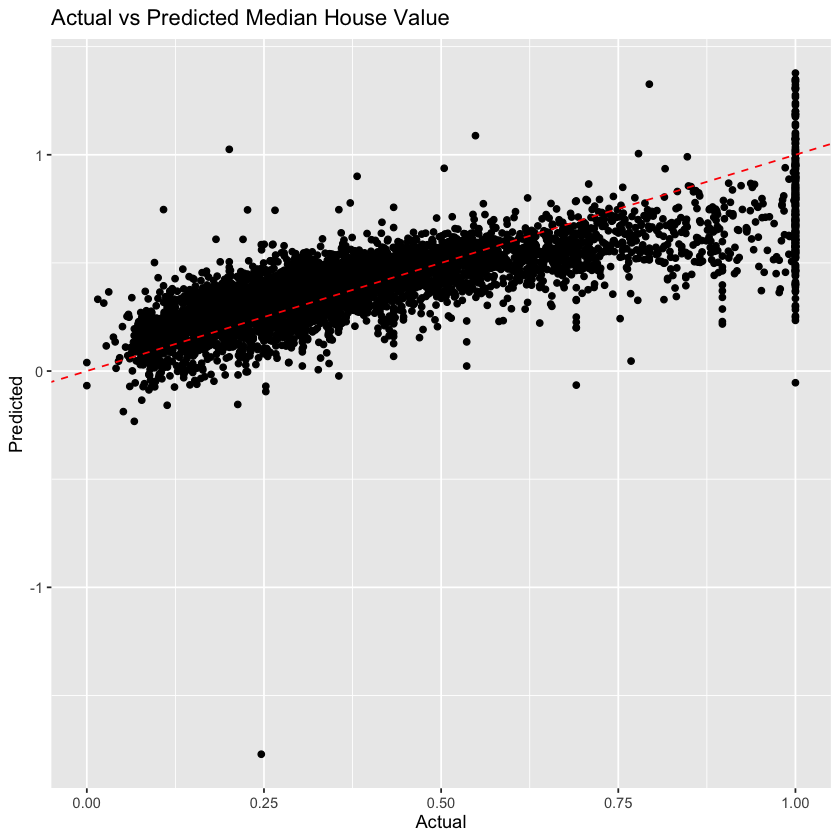


Call:
lm(formula = f, data = housing_num %>% filter(train))

Coefficients:
       (Intercept)           longitude            latitude  housing_median_age  
           0.72881            -0.86822            -0.81759             0.12250  
       total_rooms          population          households       median_income  
          -0.06506            -3.52625             1.96705             1.14354  


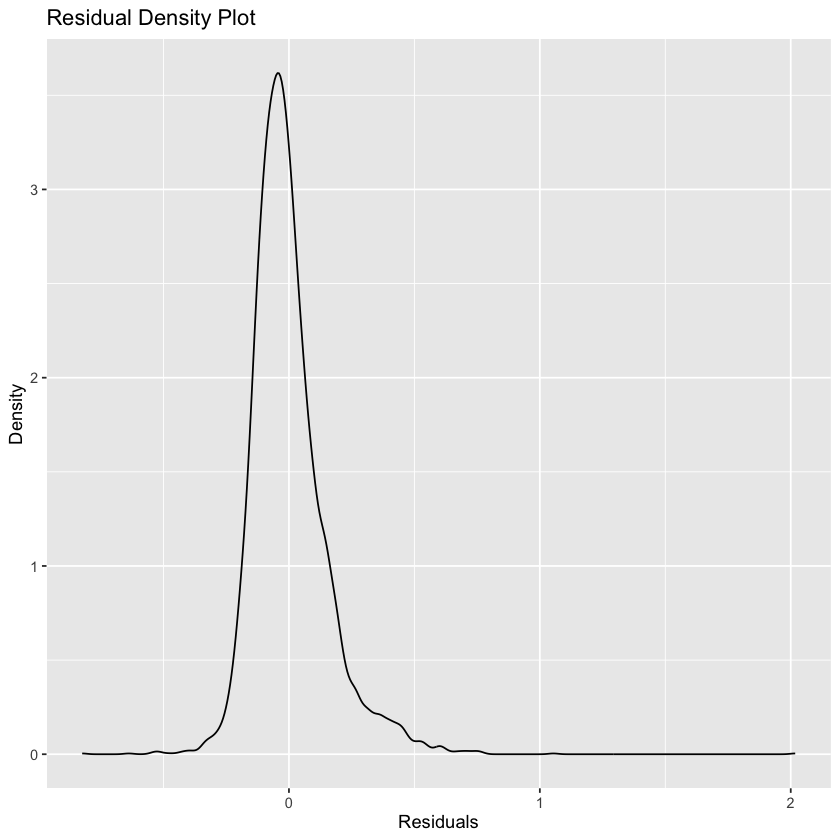

In [6]:
library(tidyverse)
library(dplyr)
library(ggplot2)

#a) load and view data
housing <- read.csv("~/Downloads/housing.csv")
head(housing)
#Linear regression is appropriate because we want to predict a continuous outcome from a set of numeric predictors.

#b) scale and split 75/25
scale <- function(a){
  (a - min(a)) / (max(a) - min(a))
}

housing_num <- housing %>% 
  select(where(is.numeric)) %>% 
  mutate(across(where(is.numeric), scale))

set.seed(123)
train <- runif(nrow(housing_num)) < 0.75
test <- !train

#c) fit the model
f <- median_house_value ~ .

m <- lm(f, data = housing_num %>% filter(train))
summary(m)

#d) predictions on test data and actual v. predicted plot
housing_test <- housing_num %>% filter(test)

housing_test <- housing_test %>%
  mutate(median_house_value_pred = predict(m, housing_test %>% as.data.frame()))

ggplot(housing_test, aes(median_house_value, median_house_value_pred)) +
  geom_point() + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  labs(title = "Actual vs Predicted Median House Value", x = "Actual", y = "Predicted")

#e) residuals plot
ggplot(housing_test, aes(median_house_value - median_house_value_pred)) +
  geom_density() +
  labs(title = "Residual Density Plot", x = "Residuals", y = "Density")

m

**Question 6**

In [11]:
install.packages("glmnet")

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’





The downloaded binary packages are in
	/var/folders/80/5qy32fkj60j1kv9n8rlpvtbc0000gn/T//RtmpusIfbA/downloaded_packages


Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74…
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, …
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, …
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3…
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …



Call:
glm(formula = f, family = binomial(), data = diabetes_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.0501     0.7875 -10.223  < 2e-16 ***
Pregnancies                1.9808     0.6376   3.107  0.00189 ** 
Glucose                    7.3239     0.8832   8.293  < 2e-16 ***
BloodPressure             -1.6659     0.7236  -2.302  0.02131 *  
SkinThickness              0.4781     0.7778   0.615  0.53875    
Insulin                   -1.1441     0.8556  -1.337  0.18117    
BMI                        5.7136     1.1584   4.932 8.12e-07 ***
DiabetesPedigreeFunction   1.6852     0.7724   2.182  0.02912 *  
Age                        0.9522     0.6526   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number of 

measure,value
<chr>,<dbl>
True Positive,36.0000000
False Positive,13.0000000
True Negative,112.0000000
False Negative,31.0000000
Accuracy,0.7708333


[1] "(Intercept)"              "Pregnancies"             
[3] "Glucose"                  "BloodPressure"           
[5] "SkinThickness"            "Insulin"                 
[7] "BMI"                      "DiabetesPedigreeFunction"
[9] "Age"

measure,value
<chr>,<dbl>
True Positive,34.000000
False Positive,12.000000
True Negative,113.000000
False Negative,33.000000
Accuracy,0.765625


Model,Accuracy
<chr>,<dbl>
Standard Logistic,0.7708333
LASSO Logistic,0.7656250


`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.01”


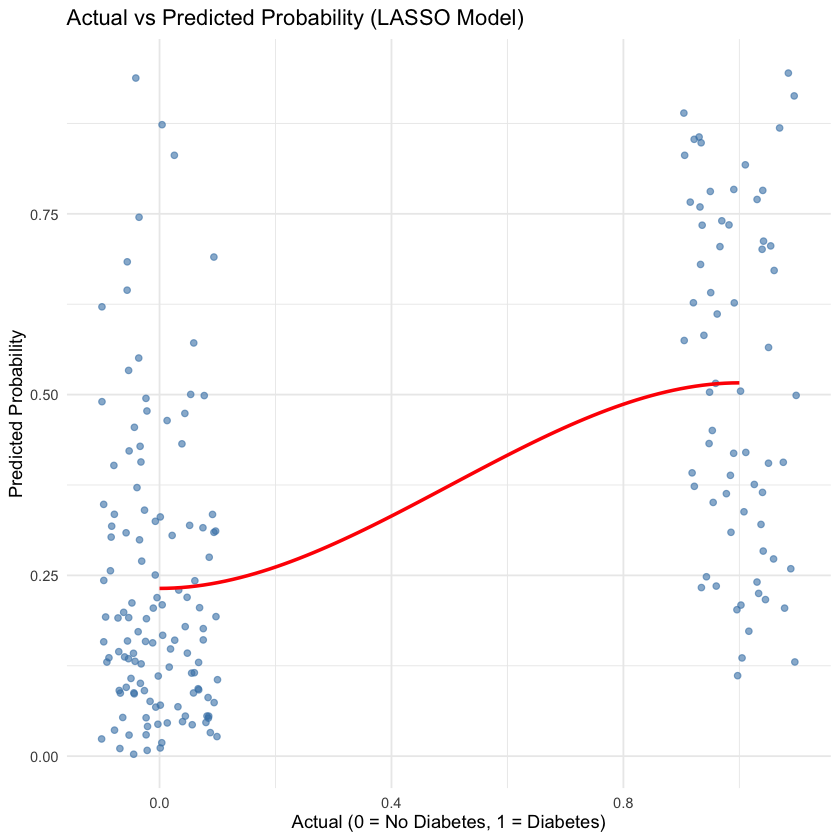

In [16]:
library(tidyverse)
library(glmnet)

#a) load and view data
diabetes <- read.csv("~/Downloads/diabetes.csv")
glimpse(diabetes)
#Logistic regression is appropriate because the outcome variable is binary, and we want to model its probability
#given the continuous predictors.

#b) scale and split 75/25
scale <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

diabetes <- diabetes %>%
  filter(complete.cases(.)) %>%
  mutate(across(where(is.numeric), scale))

diabetes <- diabetes %>%
  mutate(Outcome = as.numeric(Outcome))  

set.seed(123)
n <- nrow(diabetes)
train_idx <- sample.int(n, size = floor(0.75 * n))
diabetes_train <- diabetes %>% slice(train_idx)
diabetes_test  <- diabetes %>% slice(setdiff(seq_len(n), train_idx))

#c) fit the model
f <- Outcome ~ .   
m <- glm(f, data = diabetes_train, family = binomial())
summary(m)

#d) predictions on test data
p <- predict(m, newdata = diabetes_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- diabetes_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

metrics <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)
metrics

#e) LASSO logistic regression model
set.seed(123)
x <- model.matrix(f, diabetes_train)[, -1]   
y <- diabetes_train$Outcome

lasso <- cv.glmnet(x, y, family = "binomial", alpha = 1)

coef_lasso <- coef(lasso, s = "lambda.min")

nonzero_vars <- rownames(coef_lasso)[which(coef_lasso != 0)]
nonzero_vars

x_test <- model.matrix(f, diabetes_test)[, -1]
p_lasso <- predict(lasso, newx = x_test, s = "lambda.min", type = "response")
pred_lasso <- as.integer(p_lasso >= 0.5)

tp_l <- sum(pred_lasso == 1 & truth == 1)
fp_l <- sum(pred_lasso == 1 & truth == 0)
tn_l <- sum(pred_lasso == 0 & truth == 0)
fn_l <- sum(pred_lasso == 0 & truth == 1)
acc_l <- (tp_l + tn_l) / (tp_l + fp_l + tn_l + fn_l)

metrics_lasso <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp_l, fp_l, tn_l, fn_l, acc_l)
)
metrics_lasso

# comparing accuracy
tibble(Model = c("Standard Logistic", "LASSO Logistic"),
       Accuracy = c(acc, acc_l))
#Standard logistic overestimates the accuracy compared to the LASSO.

#f) actual v. predicted plot
ggplot(diabetes_test, aes(x = truth, y = as.numeric(p_lasso))) +
  geom_jitter(width = 0.1, height = 0, alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(title = "Actual vs Predicted Probability (LASSO Model)",
       x = "Actual (0 = No Diabetes, 1 = Diabetes)",
       y = "Predicted Probability") +
  theme_minimal()